# Climate Change and Impacts in Africa

According to the [United Nations](https://www.un.org/en/climatechange/what-is-climate-change), Climate change refers to long-term shifts in temperatures and weather patterns. Such shifts can be natural, due to changes in the sun’s activity or large volcanic eruptions. But since the 1800s, **human activities** have been the main driver of climate change, primarily due to the burning of fossil fuels like coal, oil, and gas.

The consequences of climate change now include, among others, intense droughts, water scarcity, severe fires, rising sea levels, flooding, melting polar ice, catastrophic storms, and declining biodiversity.

You work for a Non-governmental organization tasked with reporting the state of climate change in Africa at the upcoming African Union Summit. The head of analytics has provided you with [IEA-EDGAR CO2 dataset](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117) which you will clean, combine and analyze to create a report on the state of climate change in Africa. You will also provide insights on the impact of climate change on African regions (with four countries, one from each African region, as case studies). 

## Dataset

*The dataset, IEA-EDGAR CO2, is a component of the EDGAR (Emissions Database for Global Atmospheric Research) Community GHG database version 7.0 (2022) including or based on data from IEA (2021) Greenhouse Gas Emissions from Energy, www.iea.org/statistics, as modified by the Joint Research Centre. The data source was the [EDGARv7.0_GHG website](https://edgar.jrc.ec.europa.eu/dataset_ghg70) provided by Crippa *et. al.* (2022) and with [DOI](https://data.europa.eu/doi/10.2904/JRC_DATASET_EDGAR).*

The dataset contains three sheets - `IPCC 2006`, `1PCC 1996`, and `TOTALS BY COUNTRY` on the amount of CO2 (a greenhouse gas) generated by countries between 1970 and 2021. **You can download the dataset from your workspace or inspect the dataset directly [here](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117)**.

### TOTALS BY COUNTRY SHEET

This sheet contains the annual CO2 (kt) produced between 1970 - 2021 in each country. The relevant columns in this sheet are:

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |


### IPCC 2006

These sheets contain the amount of CO2 by country and the industry responsible. 

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |
| `ipcc_code_2006_for_standard_report_name` | The industry responsible for generating CO2 |

## Instructions

The head of analytics in your organization has specifically asked you to do the following:


1. Clean and tidy the datasets. 
2. Create a line plot to show the trend of `CO2` levels across the African regions.
3. Determine the relationship between time (`Year`) and `CO2` levels across the African regions.
4. Determine if there is a significant difference in the `CO2` levels among the African Regions.
5. Determine the most common (top 5) industries in each African region.
6. Determine the industry responsible for the most amount of CO2 (on average) in each African Region.
7. Predict the `CO2` levels (at each African region) in the year 2025.
8. Determine if `CO2` levels affect annual `temperature` in the selected African countries.


## IMPORTANT

- Make a copy of this workspace.

- Write your code within the cells provided for you. Each of those cells contain the comment "`#Your code here`".

- Next, run the cells containing the checks. **We've asked you not to modify these cells**. To pass a check, make sure you create the variables mentioned in the instruction tasks. They (the variables) will be verified for correctness; if the cell outputs nothing your solution passes else the cell will throw an error. We included messages to help you fix these errors. 

- If you're stuck (even after reviewing related DataCamp courses), then uncomment and run the cell which contains the source code of the solution. For example, `print(inspect.getsource(solutions.solution_one))` will display the solution for instruction 1. **We advise you to only look at the solution to your current problem.**

- Note that workspaces created inside the "I4G 23/24" group are always private to the group and cannot be made public.

- If after completion you want to showcase your work on your DataCamp portfolio, use "File > Make a copy" to copy over the workspace to your personal account. Then make it public so it shows up on your DataCamp portfolio.

- We hope you enjoy working on this project as we enjoyed creating it. Cheers!

In [1]:
# Setup
import pandas as pd
import numpy as np
import pingouin
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt
import inspect

plt.style.use('ggplot')
# The sheet names containing our datasets
sheet_names = ['IPCC 2006', 'TOTALS BY COUNTRY']

# The column names of the dataset starts from rows 11
# Let's skip the first 10 rows
datasets = pd.read_excel('IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name = sheet_names, skiprows = 10)

# we need only the African regions
african_regions = ['Eastern_Africa', 'Western_Africa', 'Southern_Africa', 'Northern_Africa']

ipcc_2006_africa = datasets['IPCC 2006'].query('C_group_IM24_sh in @african_regions')

totals_by_country_africa = datasets['TOTALS BY COUNTRY'].query('C_group_IM24_sh in @african_regions')


# Read the temperatures datasets containing four African countries
# One from each African Region:
# Nigeria:    West Africa
# Ethiopa :   East Africa
# Tunisia:    North Africa
# Mozambique: South Africa
temperatures = pd.read_csv('temperatures.csv')

In [2]:
# The solution code and the test runner
import tests as runner
import solutions

In [ ]:
## Inspecting datasets

In [3]:
datasets

{'IPCC 2006':        IPCC_annex       C_group_IM24_sh  ...      Y_2020      Y_2021
 0     Non-Annex_I  Rest Central America  ...    3.378899    3.378899
 1     Non-Annex_I  Rest Central America  ...    8.047569    8.047569
 2     Non-Annex_I  Rest Central America  ...    7.808080    7.808080
 3     Non-Annex_I  Rest Central America  ...    2.450398    2.450398
 4     Non-Annex_I  Rest Central America  ...         NaN         NaN
 ...           ...                   ...  ...         ...         ...
 4768  Non-Annex_I       Southern_Africa  ...    1.389039    1.417387
 4769  Non-Annex_I       Southern_Africa  ...   10.500000         NaN
 4770  Non-Annex_I       Southern_Africa  ...  222.373569  310.070187
 4771  Non-Annex_I       Southern_Africa  ...   54.166537   57.980658
 4772  Non-Annex_I       Southern_Africa  ...         NaN         NaN
 
 [4773 rows x 60 columns],
 'TOTALS BY COUNTRY':         IPCC_annex       C_group_IM24_sh  ...         Y_2020         Y_2021
 0      Non-Annex_I 

In [4]:
ipcc_2006_africa.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,Y_1975,Y_1976,Y_1977,Y_1978,Y_1979,Y_1980,Y_1981,Y_1982,Y_1983,Y_1984,Y_1985,Y_1986,Y_1987,Y_1988,Y_1989,Y_1990,Y_1991,Y_1992,Y_1993,Y_1994,Y_1995,Y_1996,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
42,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.2,Manufacturing Industries and Construction,CO2,bio,468.101210,468.101210,469.301150,471.101470,473.501350,476.601250,480.001350,484.201130,489.001300,493.801470,498.601210,503.101190,507.601160,512.201200,517.001360,521.901170,526.901470,532.301180,538.001090,544.601170,552.001330,615.253250,567.001380,531.838190,556.223510,636.956950,605.186400,624.371710,651.849890,653.749860,664.842440,676.534980,680.035150,683.735020,674.545940,678.146170,775.268740,825.231850,849.517100,839.431800,846.532190,862.324450,878.017490,876.424760,694.984348,628.393538,716.208742,745.933600,790.238440,796.965524,806.888450,835.471254
43,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.4,Residential and other sectors,CO2,bio,9803.605447,9803.605447,9856.754530,9929.203032,10030.351017,10160.498759,10301.945770,10473.542238,10671.238252,10873.034335,11070.930479,11257.476684,11449.072937,11640.019473,11837.215117,12040.811150,12245.507023,12467.352793,12710.747951,12983.342464,13287.286414,13595.930453,13913.823860,14237.417597,14513.014646,14689.257660,14870.896908,15014.587900,15155.978474,15301.919333,15469.209459,15660.949552,15867.189824,16027.035971,16186.482266,16341.128832,16640.372077,16940.815201,17241.658215,17544.701810,17848.844864,18153.687909,18457.831374,18758.674388,19052.717572,19338.111419,19616.705006,19909.315374,20177.076755,20441.554365,20904.334177,20904.334177
44,Non-Annex_I,Southern_Africa,AGO,Angola,1.B.1,Solid Fuels,CO2,bio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Non-Annex_I,Southern_Africa,AGO,Angola,3.C.1,Emissions from biomass burning,CO2,bio,1168.997514,1149.912236,1146.276608,1188.270013,1098.717746,1098.672779,1101.969422,1005.182967,1011.234997,915.818990,949.744370,872.287869,868.832441,890.351350,899.461328,912.785112,1037.186584,1077.998947,1056.754802,1006.037000,887.898103,1034.262216,1123.959976,1144.701237,1150.119628,1087.997316,1181.117058,1156.381580,1364.672739,1264.756268,1355.780920,1552.396976,1741.116732,1884.592690,2111.105381,2329.745611,2202.679384,2477.831538,2087.565334,2949.073913,3101.364647,3574.520152,2224.584701,3824.749751,3521.645794,3651.157894,4482.919263,4500.168653,4686.371296,4779.221426,4386.060462,4085.260834
46,Non-Annex_I,Southern_Africa,AGO,Angola,1.A.1.a,Main Activity Electricity and Heat Production,CO2,fossil,137.584287,137.584287,159.267651,168.796307,371.818686,352.955852,346.538807,346.538807,346.538807,386.988094,399.822184,399.822184,421.991080,459.522902,117.356874,160.917764,204.478337,173.363552,260.485008,244.927616,291.599792,244.927616,172.586962,125.235417,175.019198,171.907594,197.090547,416.629678,385.126281,621.107697,728.548262,820.624961,820.624961,1027.529371,653.290455,767.438503,868.947243,976.775149,1385.920126,2226.378347,2369.112639,2229.586869,2699.129471,3993.658132,5669.710708,6130.962446,4198.262959,4071.508850,4016.468964,4612.129507,4304.458056,4687.903324


In [5]:
totals_by_country_africa.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,Y_1975,Y_1976,Y_1977,Y_1978,Y_1979,Y_1980,Y_1981,Y_1982,Y_1983,Y_1984,Y_1985,Y_1986,Y_1987,Y_1988,Y_1989,Y_1990,Y_1991,Y_1992,Y_1993,Y_1994,Y_1995,Y_1996,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
2,Non-Annex_I,Southern_Africa,AGO,Angola,CO2,20393.274068,19959.926969,21860.851718,22960.875811,23436.330631,22666.196272,19201.301175,24020.700414,26410.708507,26487.027464,26861.308092,25888.633268,25620.805568,26293.854273,26643.647803,27616.242673,28099.085662,28632.242976,29310.776810,29702.183130,26025.382685,27096.481653,27801.150922,28127.608325,27787.676875,29453.900602,32430.325983,33295.920830,34310.556491,35354.810082,34104.669590,34184.397138,34324.976979,36045.571750,36788.078823,35325.283451,36353.193475,37491.020928,39679.774031,42655.564104,44770.499444,46455.168480,45747.276981,51282.174272,53677.191990,56211.792887,55507.493078,51285.300069,49702.305850,51343.735537,49153.126915,50275.123467
14,Non-Annex_I,Eastern_Africa,BDI,Burundi,CO2,4385.562636,4252.930585,4363.612720,4358.525092,4369.160007,4488.276934,4539.717900,4626.132886,4772.893954,4895.565393,5037.523017,5127.364278,5347.804182,5519.523388,5691.476172,5820.471640,6054.836981,6305.044979,6589.079942,6818.745162,7771.771328,8006.900690,8056.252748,8258.867228,8446.275200,8867.914465,9113.428876,9225.789694,9587.753006,7144.496683,7403.975407,10248.011408,10452.420002,10668.265339,10909.182644,11050.134198,11173.208119,11626.417336,11691.329542,11977.183580,12346.667414,12622.895513,8459.288013,9149.054624,9159.419598,9266.117147,9566.111424,9682.155915,9978.899053,10259.091787,10117.781634,10195.577902
16,Non-Annex_I,Western_Africa,BEN,Benin,CO2,4318.786819,4331.965113,4520.457422,4610.356288,4687.945024,4813.954152,4710.153696,4882.043721,5087.592911,5224.267501,5310.929795,5353.470327,5531.860143,5651.180582,5840.280569,6083.683627,6135.089827,6168.653966,6357.523926,6453.559167,6584.523814,6705.170088,6879.178587,7051.875783,7202.702923,7378.033927,8681.397288,9000.074667,8780.116883,8710.368254,7310.880172,7754.767109,8290.703718,8618.359432,8970.188838,9409.451456,11064.330305,11842.515661,12107.991804,12697.538321,12280.167241,12330.344538,12358.663172,13531.050710,14190.811414,14756.624395,16399.517824,16772.596446,18298.343482,18596.362918,18428.166791,19018.648794
17,Non-Annex_I,Western_Africa,BFA,Burkina Faso,CO2,8158.106987,8168.513580,8287.030827,8459.268901,8556.373860,8805.602954,8771.463061,9065.529375,9208.066952,9262.538023,9428.059967,9642.477222,9644.430926,9842.659717,10047.268997,10251.757097,10617.709012,10966.259470,11307.673774,11448.081768,12913.394412,13335.090556,13726.449311,14003.397846,14149.296093,14623.770584,14669.864637,15003.823330,15222.522701,11103.823354,11255.343077,12244.734345,10758.856767,11319.951107,13225.839940,16644.993530,17203.709903,18281.857291,20307.795794,20447.979487,21030.497507,21075.295912,22910.057888,23772.638294,23681.040829,25167.623449,25915.830695,26939.500315,28175.585069,28984.431716,29300.234771,29548.239352
31,Non-Annex_I,Southern_Africa,BWA,Botswana,CO2,947.246888,1023.689503,971.345976,1047.179577,1331.197530,1449.426514,1776.361561,1884.603895,1969.127456,2103.674206,2317.705316,3180.822144,3183.048634,3201.553149,3253.899795,3453.791239,3758.004617,3791.886933,4613.107485,4844.358346,4985.079424,5008.564530,5697.304825,5771.647047,5804.749142,5847.173969,5615.316415,5747.130499,6248.606278,6657.247838,6731.682240,6661.913642,6843.946487,6671.288531,6466.724383,6757.406872,6612.827689,6760.570293,6835.866785,6616.708927,5755.862895,6343.133195,5696.663997,7668.026698,9295.462092,9170.933436,8868.575860,9533.137111,9601.783432,9460.722213,8927.915806,9239.451125


In [6]:
temperatures.head()

,Year,Ethiopia,Mozambique,Nigeria,Tunisia
0,1960,22.59,23.82,26.87,19.78
1,1961,22.30,24.00,26.28,19.67
2,1962,22.36,23.77,26.68,19.37
3,1963,22.56,23.27,27.02,19.33
4,1964,22.15,23.47,26.66,19.41


In [7]:
print(totals_by_country_africa.shape)
print(temperatures.shape)

(56, 57)
(62, 5)


## Instruction 1: Clean and tidy the datasets

### Tasks

- Rename `C_group_IM24_sh` to `Region`, `Country_code_A3` to `Code`, and `ipcc_code_2006_for_standard_report_name` to `Industry` in the corresponding African datasets.
- Drop `IPCC_annex`, `ipcc_code_2006_for_standard_report`, and `Substance` from the corresponding datasets.
- Melt `Y_1970` to `Y_2021` into a two columns `Year` and `CO2`. Drop rows where `CO2` is missing.
- Convert `Year` to `int` type.

### Hints

- Use `df.rename()` method to rename columns.
- The `df.drop()` method can be used to drop columns.
- You might find `df.melt()` or `pd.melt()` useful.
- The `df.column.astype(int)` can be used to convert to a column to an integer type.

In [8]:
# Your code here (for the learner)

# Task 1: Rename columns
ipcc_2006_africa.rename(columns={'C_group_IM24_sh': 'Region', 'Country_code_A3': 'Code', 'ipcc_code_2006_for_standard_report_name': 'Industry'}, inplace=True)
totals_by_country_africa.rename(columns={'C_group_IM24_sh': 'Region', 'Country_code_A3': 'Code'}, inplace=True)

In [9]:
# Task 2: Drop unnecessary columns
ipcc_2006_africa.drop(columns=['IPCC_annex', 'ipcc_code_2006_for_standard_report', 'Substance'], inplace=True)
totals_by_country_africa.drop(columns=['IPCC_annex', 'Substance'], inplace=True)

In [10]:
# check result
totals_by_country_africa.head()

,Region,Code,Name,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,Y_1975,Y_1976,Y_1977,Y_1978,Y_1979,Y_1980,Y_1981,Y_1982,Y_1983,Y_1984,Y_1985,Y_1986,Y_1987,Y_1988,Y_1989,Y_1990,Y_1991,Y_1992,Y_1993,Y_1994,Y_1995,Y_1996,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
2,Southern_Africa,AGO,Angola,20393.274068,19959.926969,21860.851718,22960.875811,23436.330631,22666.196272,19201.301175,24020.700414,26410.708507,26487.027464,26861.308092,25888.633268,25620.805568,26293.854273,26643.647803,27616.242673,28099.085662,28632.242976,29310.776810,29702.183130,26025.382685,27096.481653,27801.150922,28127.608325,27787.676875,29453.900602,32430.325983,33295.920830,34310.556491,35354.810082,34104.669590,34184.397138,34324.976979,36045.571750,36788.078823,35325.283451,36353.193475,37491.020928,39679.774031,42655.564104,44770.499444,46455.168480,45747.276981,51282.174272,53677.191990,56211.792887,55507.493078,51285.300069,49702.305850,51343.735537,49153.126915,50275.123467
14,Eastern_Africa,BDI,Burundi,4385.562636,4252.930585,4363.612720,4358.525092,4369.160007,4488.276934,4539.717900,4626.132886,4772.893954,4895.565393,5037.523017,5127.364278,5347.804182,5519.523388,5691.476172,5820.471640,6054.836981,6305.044979,6589.079942,6818.745162,7771.771328,8006.900690,8056.252748,8258.867228,8446.275200,8867.914465,9113.428876,9225.789694,9587.753006,7144.496683,7403.975407,10248.011408,10452.420002,10668.265339,10909.182644,11050.134198,11173.208119,11626.417336,11691.329542,11977.183580,12346.667414,12622.895513,8459.288013,9149.054624,9159.419598,9266.117147,9566.111424,9682.155915,9978.899053,10259.091787,10117.781634,10195.577902
16,Western_Africa,BEN,Benin,4318.786819,4331.965113,4520.457422,4610.356288,4687.945024,4813.954152,4710.153696,4882.043721,5087.592911,5224.267501,5310.929795,5353.470327,5531.860143,5651.180582,5840.280569,6083.683627,6135.089827,6168.653966,6357.523926,6453.559167,6584.523814,6705.170088,6879.178587,7051.875783,7202.702923,7378.033927,8681.397288,9000.074667,8780.116883,8710.368254,7310.880172,7754.767109,8290.703718,8618.359432,8970.188838,9409.451456,11064.330305,11842.515661,12107.991804,12697.538321,12280.167241,12330.344538,12358.663172,13531.050710,14190.811414,14756.624395,16399.517824,16772.596446,18298.343482,18596.362918,18428.166791,19018.648794
17,Western_Africa,BFA,Burkina Faso,8158.106987,8168.513580,8287.030827,8459.268901,8556.373860,8805.602954,8771.463061,9065.529375,9208.066952,9262.538023,9428.059967,9642.477222,9644.430926,9842.659717,10047.268997,10251.757097,10617.709012,10966.259470,11307.673774,11448.081768,12913.394412,13335.090556,13726.449311,14003.397846,14149.296093,14623.770584,14669.864637,15003.823330,15222.522701,11103.823354,11255.343077,12244.734345,10758.856767,11319.951107,13225.839940,16644.993530,17203.709903,18281.857291,20307.795794,20447.979487,21030.497507,21075.295912,22910.057888,23772.638294,23681.040829,25167.623449,25915.830695,26939.500315,28175.585069,28984.431716,29300.234771,29548.239352
31,Southern_Africa,BWA,Botswana,947.246888,1023.689503,971.345976,1047.179577,1331.197530,1449.426514,1776.361561,1884.603895,1969.127456,2103.674206,2317.705316,3180.822144,3183.048634,3201.553149,3253.899795,3453.791239,3758.004617,3791.886933,4613.107485,4844.358346,4985.079424,5008.564530,5697.304825,5771.647047,5804.749142,5847.173969,5615.316415,5747.130499,6248.606278,6657.247838,6731.682240,6661.913642,6843.946487,6671.288531,6466.724383,6757.406872,6612.827689,6760.570293,6835.866785,6616.708927,5755.862895,6343.133195,5696.663997,7668.026698,9295.462092,9170.933436,8868.575860,9533.137111,9601.783432,9460.722213,8927.915806,9239.451125


In [ ]:
# Task 3: Melt the Y_1970 to Y_2021 columns
ipcc_2006_africa = pd.melt(ipcc_2006_africa, id_vars=['Region', 'Code', 'Name', 'Industry'], var_name='Year', value_name='CO2')
totals_by_country_africa = pd.melt(totals_by_country_africa, id_vars=['Region', 'Code', 'Name'], var_name='Year', value_name='CO2')

In [14]:
# Convert Year to int type
ipcc_2006_africa['Year'] = ipcc_2006_africa['Year'].str.replace('Y_', '').astype(int)
totals_by_country_africa['Year'] = totals_by_country_africa['Year'].str.replace('Y_', '').astype(int)

In [15]:
# Display the cleaned and tidied datasets
ipcc_2006_africa.head()

,Region,Code,Name,Industry,fossil_bio,Year,CO2
0,Southern_Africa,AGO,Angola,Manufacturing Industries and Construction,bio,1970,468.101210
1,Southern_Africa,AGO,Angola,Residential and other sectors,bio,1970,9803.605447
3,Southern_Africa,AGO,Angola,Emissions from biomass burning,bio,1970,1168.997514
4,Southern_Africa,AGO,Angola,Main Activity Electricity and Heat Production,fossil,1970,137.584287
5,Southern_Africa,AGO,Angola,Petroleum Refining - Manufacture of Solid Fuel...,fossil,1970,74.805080


In [16]:
totals_by_country_africa.head()

,Region,Code,Name,Year,CO2
0,Southern_Africa,AGO,Angola,1970,20393.274068
1,Eastern_Africa,BDI,Burundi,1970,4385.562636
2,Western_Africa,BEN,Benin,1970,4318.786819
3,Western_Africa,BFA,Burkina Faso,1970,8158.106987
4,Southern_Africa,BWA,Botswana,1970,947.246888


In [17]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
runner.check_task_1(ipcc_2006_africa, totals_by_country_africa)

In [95]:
# Uncomment and run to view solution one
# print(inspect.getsource(solutions.solution_one))

I start by renaming the columns in the datasets to make them more intuitive. The following columns were renamed:
- Rename 'C_group_IM24_sh' to 'Region'
- Rename 'Country_code_A3' to 'Code'
- Rename 'ipcc_code_2006_for_standard_report_name' to 'Industry'

### Dropping Columns
Then, I eliminated unnecessary columns from the dataset. I dropped the following columns:
- Drop 'IPCC_annex', as it's not relevant for our analysis
- Drop 'ipcc_code_2006_for_standard_report', as it's not needed
- Drop 'Substance', as it's not part of our analysis

### Melting CO2 Data
I reshaped the dataset to have a more convenient format that is columns 'Y_1970' to 'Y_2021' were melted into two columns: 'Year' and 'CO2'. Additionally, I removed rows where CO2 data is missing.

### Converting Year to Integer
To facilitate analysis, I converted the 'Year' column to the integer data type. This will ensure that we can perform calculations and comparisons with the year values.

These data preparation steps help us clean the dataset and make it ready for analysis. We can now move forward with exploring the trends and impacts of CO2 emissions in African regions.

## Instruction 2: Show the trend of `CO2` levels across the African regions

### Tasks

- Using `totals_by_country_africa`, create a line plot of `CO2` vs. `Year` in each `Region` to show the trend of CO2 levels by year.

### Hints

- Use `sns.lineplot()` to create a line plot.
- Your plot should be similar to the one shown below.

![co2_vs_year](co2_year.png)

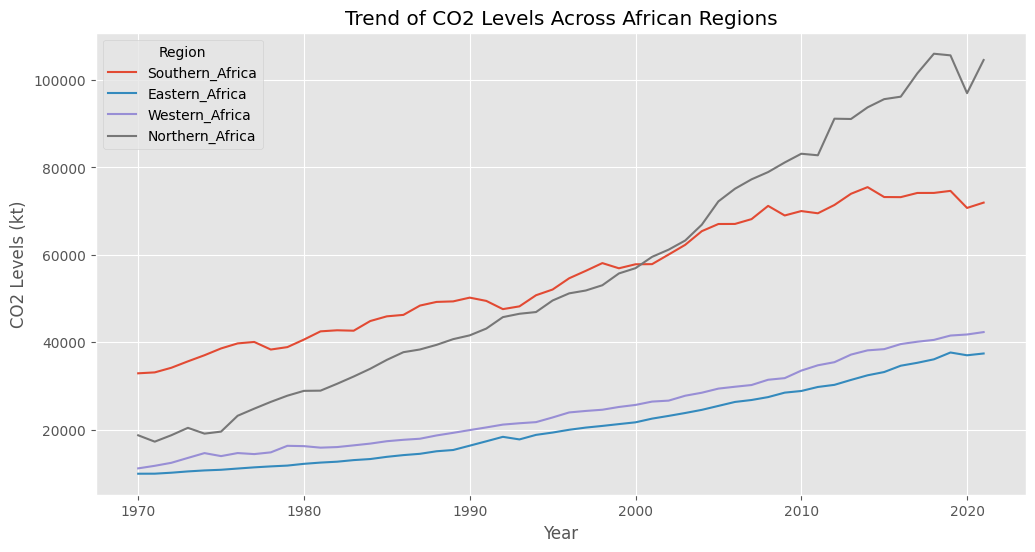

In [18]:
# Your code here
# Create a line plot of CO2 levels vs. Year in each Region
plt.figure(figsize=(12, 6))
sns.lineplot(data=totals_by_country_africa, x='Year', y='CO2', hue='Region', ci=None)
plt.title('Trend of CO2 Levels Across African Regions')
plt.xlabel('Year')
plt.ylabel('CO2 Levels (kt)')
plt.legend(title='Region')
plt.show()


In [104]:
# Uncomment and run to view solution two
# print(inspect.getsource(solutions.solution_two))

## Instruction 3: Determine the relationship between time (`Year`) and `CO2` levels across the African regions


### Tasks

- Using the `totals_by_country_africa` dataset, conduct a Spearman's correlation to determine the relationship between time (`Year`) and `CO2` within each African `Region`.
- Save the results in a variable called `relationship_btw_time_CO2`.


### Hints
- Use `df.groupby()` and `df.corr()` methods. 
- Use the `corr()` method's `method` parameter to set the correlation type.

In [19]:
# Your code here

# Group the dataset by Region and calculate Spearman's correlation between Year and CO2
relationship_btw_time_CO2 = totals_by_country_africa.groupby('Region').corr(method='spearman')[['Year', 'CO2']]

# Display the results
print(relationship_btw_time_CO2)

                          Year       CO2
Region                                  
Eastern_Africa  Year  1.000000  0.181768
                CO2   0.181768  1.000000
Northern_Africa Year  1.000000  0.429875
                CO2   0.429875  1.000000
Southern_Africa Year  1.000000  0.260986
                CO2   0.260986  1.000000
Western_Africa  Year  1.000000  0.324071
                CO2   0.324071  1.000000


In [20]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_3(relationship_btw_time_CO2)

In [109]:
# Uncomment and run to view solution three
# print(inspect.getsource(solutions.solution_three))

## Instruction 4: Determine if there is a significant difference in the CO2 levels among the African Regions

### Tasks

- Using `totals_by_country_africa`, conduct an ANOVA using `pingouin.anova()` on the `CO2` by `Region`. Save the results as `aov_results`.
- Conduct a posthoc test (with Bonferroni correction) using `pingouin.pairwise_tests()` to find the source of the significant difference. Save the results as `pw_ttest_result`.
- Is it true that the `CO2` levels of the `Southern_Africa` and `Northern_Africa` region do not differ significantly? The previous task should provide you with the answer.

In [21]:
# Your code here

# Conduct ANOVA on CO2 by Region
aov_results = pingouin.anova(data=totals_by_country_africa, dv='CO2', between='Region')

In [22]:
# Display ANOVA results
print("ANOVA Results:\n", aov_results)

ANOVA Results:
    Source  ddof1  ddof2          F         p-unc       np2
0  Region      3   2908  35.558065  1.455509e-22  0.035385


In [115]:
# Conduct posthoc test with Bonferroni correction
# pw_ttest_result = pingouin.pairwise_ttests(data=totals_by_country_africa, dv='CO2', between='Region', correction='bonf')

In [23]:
pw_ttest_result = pingouin.pairwise_tests(
        data=totals_by_country_africa,
        dv='CO2',
        between='Region',
        padjust="bonf").round(3)

In [24]:
# Display posthoc test results
print("Posthoc Test Results:\n", pw_ttest_result)

Posthoc Test Results:
   Contrast                A                B  ...  p-adjust       BF10  hedges
0   Region   Eastern_Africa  Northern_Africa  ...      bonf  1.554e+17  -0.801
1   Region   Eastern_Africa  Southern_Africa  ...      bonf  4.024e+08  -0.422
2   Region   Eastern_Africa   Western_Africa  ...      bonf      0.173  -0.059
3   Region  Northern_Africa  Southern_Africa  ...      bonf      0.079   0.005
4   Region  Northern_Africa   Western_Africa  ...      bonf  9.641e+10   0.418
5   Region  Southern_Africa   Western_Africa  ...      bonf  5.437e+05   0.335

[6 rows x 13 columns]


### **Is it true that the CO2 levels of the Southern_Africa and Northern_Africa region do not differ significantly?** 

To determine if the CO2 levels of the Southern_Africa and Northern_Africa regions differ significantly, you can look at the p-value in the posthoc test results. A p-value below the significance level (e.g., 0.05) suggests that there is a significant difference between the two regions' CO2 levels.

From the provided posthoc test results, the p-value for the contrast between "Southern_Africa" and "Northern_Africa" is 0.079. Since 0.079 is greater than 0.05 (assuming a significance level of 0.05), it suggests that there is no statistically significant difference in the CO2 levels between the Southern_Africa and Northern_Africa regions.

In [25]:
# Conduct pairwise t-test
# Run the tests
runner.check_task_4(aov_results, pw_ttest_result)

In [139]:
# Uncomment and run to view solution four
# print(inspect.getsource(solutions.solution_four))

## Instruction 5: Determine the most common (top 5) industries in each African region.

### Tasks

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Count the occurrences of each `Industry` within each `Region` and name it `Count`.
- Sort the data within each region group by `Count` in descending order
- Get the top 5 industries for each region
- save it to variable `top_5_industries` for each region.

### Hints

- You can use the `df.groupby()` method to group the data by multiple columns.
- The `df.value_counts()` function can be useful for counting occurrences.
- The `df.sort_values` function can help you with sorting.

In [26]:
# Your code here

# Group the data by Region and Industry, then count occurrences and sort
top_5_industries = ipcc_2006_africa.groupby(['Region', 'Industry'])['Industry'].count().reset_index(name='Count')
top_5_industries.sort_values(by=['Region', 'Count'], ascending=[True, False], inplace=True)

# Get the top 5 industries for each region
top_5_industries = top_5_industries.groupby('Region').head(5)

# Display the top 5 industries for each region
top_5_industries

,Region,Industry,Count
18,Eastern_Africa,Residential and other sectors,1454
9,Eastern_Africa,Manufacturing Industries and Construction,1383
8,Eastern_Africa,Main Activity Electricity and Heat Production,1174
19,Eastern_Africa,Road Transportation no resuspension,742
4,Eastern_Africa,Glass Production,728
41,Northern_Africa,Residential and other sectors,572
32,Northern_Africa,Manufacturing Industries and Construction,456
31,Northern_Africa,Main Activity Electricity and Heat Production,315
27,Northern_Africa,Glass Production,312
34,Northern_Africa,Non-Energy Products from Fuels and Solvent Use,312


In [27]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_5(top_5_industries)

In [25]:
# Uncomment and run to view solution five
# print(inspect.getsource(solutions.solution_five))

## Instruction 6: Determine the industry responsible for the most amount of CO2 (on average) in each African Region

### Tasks

- Group the `ipcc_2006_africa` data by `Region` and `Industry`.
- Calculate the average `CO2` emissions for each group.
- Find the `Industry` with the maximum average `CO2` emissions in each region.

### Hints
- You can use the `df.groupby()` method to group the data by `Region` and `Industry`.
- The `df.mean()` function can be used to calculate the average CO2 emissions for each group.
- The `df.idxmax()` function can help you find the index of the row with the maximum average CO2 emissions within each region group.
- You can use the `df.loc[]` method to select the rows corresponding to the indices found in step 3.

In [28]:
# Your code here

# Group the data by Region and Industry, then calculate average CO2 emissions
average_co2_by_industry = ipcc_2006_africa.groupby(['Region', 'Industry'])['CO2'].mean().reset_index()

# Find the Industry with the maximum average CO2 emissions in each region
max_co2_industries = average_co2_by_industry.loc[average_co2_by_industry.groupby('Region')['CO2'].idxmax()]

# Display the industry with the maximum average CO2 emissions in each region
max_co2_industries

,Region,Industry,CO2
18,Eastern_Africa,Residential and other sectors,7904.439282
31,Northern_Africa,Main Activity Electricity and Heat Production,13612.230148
54,Southern_Africa,Main Activity Electricity and Heat Production,11377.802504
87,Western_Africa,Residential and other sectors,8702.936136


In [29]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_6(max_co2_industries)

In [29]:
# Uncomment and run to view solution six
# print(inspect.getsource(solutions.solution_six))

## Instruction 7: Predict the `CO2` levels (at each African region) in the year 2025

### Tasks

- Create an instance of `LinearRegression()` and save it as `reg`.
- Fit a linear model of `CO2` (in log base 10) by `Year` and `Region` using `reg.fit()`.
- Predict the values of `CO2` using the `reg.predict()` and the data provided. Save the result as `predicted_co2`. 
- Convert `predicted_co2` values from log base 10 to decimals and round to 2 d.p using `np.round()`.


### Hints

- Use `pd.get_dummies()` on the features to one-hot-encode the `Region` column before fitting the model.
- If `Y = np.log10(X)`, then `X = 10**Y`.

In [30]:
# Your code here
# data provided for you
newdata = pd.DataFrame({ 'Year': 2025, 'Region': african_regions })
newdata = pd.get_dummies(newdata)

In [31]:
# Create an instance of LinearRegression
reg = LinearRegression()

# The actual solution for your notebook
target = np.log10(totals_by_country_africa['CO2'])
feats = pd.get_dummies(totals_by_country_africa[['Year', 'Region']])
reg.fit(feats, target)
predicted_co2 = reg.predict(newdata)
predicted_co2 = np.round(10**predicted_co2, 2)

# Display the predicted CO2 levels for each region in the year 2025
for i, region in enumerate(african_regions):
    print(f"Predicted CO2 in {region} region in 2025: {predicted_co2[i]} kt")

Predicted CO2 in Eastern_Africa region in 2025: 15177.72 kt
Predicted CO2 in Western_Africa region in 2025: 10788.07 kt
Predicted CO2 in Southern_Africa region in 2025: 37761.69 kt
Predicted CO2 in Northern_Africa region in 2025: 41081.9 kt


In [32]:
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
# predicted_co2 = [10**x for x in predicted_co2]  # Convert from log10 to decimals
runner.check_task_7(predicted_co2)

In [36]:
# Uncomment and run to view solution seven
# print(inspect.getsource(solutions.solution_seven))

## Instruction 8: Determine if CO2 levels affect annual temperature in the selected African countries

![relationship between co2 and temp](co2_temp.png)


### Tasks

- Select `Name`, `Year` and `CO2` of countries `countries`. Save the result as `selected_countries`.
- Convert `temperatures` dataset from wide to long format. Set the new column names to `Name` and `Temperature`. Save the result as `temp_long`.
- Perform an inner join between `selected_countries` and `temp_long` on `Name` and `Year`. Save the result as `joined`.
- Create a linear model of `Temperature` by `CO2` and `Name`. Save the result as `model_temp`. *The code has been added for you.*
- A one unit rise in log10 `CO2` leads to how many degrees rise in temperature? Run `model_temp.summary()` to find out!
- What is the adjusted R squared value of the model?

### Hints

- `df.melt()` converts a dataset from wide to long.
- `pd.merge()` can be used to perform all kinds of joins.

In [35]:
# Your code here
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]

selected_countries = 

temp_long =

joined = pd.merge(selected_countries, temp_long, on='___', how='___')

# Provided for you
# Uncomment and run to complete this task
# model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data = joined).fit()
# model_temp.summary()

In [45]:
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]
selected_countries = totals_by_country_africa[['Name', 'Year', 'CO2']].query('Name in @countries')
temp_long = temperatures.melt(id_vars=['Year'],value_vars=countries,var_name='Name', value_name='Temperature')

joined = pd.merge(selected_countries, temp_long, on=['Name', 'Year'], how='inner')


# Provided for you
# Uncomment and run to complete this task
model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data=joined).fit()
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3241.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          1.22e-182
Time:                        12:50:33   Log-Likelihood:                -54.347
No. Observations:                 208   AIC:                             118.7
Df Residuals:                     203   BIC:                             135.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.4981      0.583     23.138      0.000      12.348      14.648
Name[T.Mozambique]     2.0759      0.090     23.021      0.000       1.898       2.254
Name[T.Nigeria]        2.8345      0.092     30.884      0.000       2.654       3.016
Name[T.Tunisia]       -1.6254      0.104    -15.673      0.000      -1.830      -1.421
np.log10(CO2)          1.9472      0.117     16.620      0.000       1.716       2.178
==============================================================================
Omnibus:                        3.230   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.985
Skew:                          -0.291   Prob(JB):                        0.225
Kurtosis:                       3.073   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# DO NOT MODIFY THIS CELL
# DO NOT MODIFY THIS CELL
# Run this cell to determine if you've done the above correctly
# If there are no error messages, you are correct :)
# tests
runner.check_task_8(joined, model_temp)

In [46]:
# Uncomment and run to view solution eight
# print(inspect.getsource(solutions.solution_eight))

**1. A one unit rise in log10 CO2 leads to how many degrees rise in temperature?**

From the coefficient of np.log10(CO2) in the regression results:

Coefficient for np.log10(CO2) is 1.9472.
This means that a one unit rise in log10 CO2 leads to approximately a 1.9472 degrees rise in temperature.

**2. What is the adjusted R-squared value of the model?**

The adjusted R-squared value is given in the regression results:

Adj. R-squared: 0.984
The adjusted R-squared value of the model is approximately 0.984.

The adjusted R-squared value represents the proportion of the variance in the dependent variable (Temperature) that can be explained by the independent variables (CO2 and Name) in the model, adjusted for the number of predictors in the model. It is a measure of how well the independent variables explain the variation in the dependent variable while taking into account the complexity of the model. A higher adjusted R-squared value indicates a better fit of the model to the data.